### Goals for Data preparation
<span style="color:yellow">

1. Data Cleaning - Adresssing missing values, inconsistency and outliers

2. Data Formating - Formating data suitable to requirments

3. Data Imputation - Handling missing values in the dataset through imputation techniques (KNN 
(K-Nearest Neighbors) imputation or regression imputation)

4. Data Transformation - scaling, normalization, encoding categorical variables, and feature engineering

5. Feature selection - reduce dimensionality and mitigate overfitting

6. Data sampling - addressing data imbalance

7. Data Validation 
</span>



In [371]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# importing utilities functions which is in the same directory under scrips/utilities folder

import sys
sys.path.append('../scripts')
import utilities as ut


In [372]:
# Load Raw Dataset from data/raw folder
df = pd.read_csv("../../../data/raw/steel_industry_data_excerpt.csv")
        

In [373]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
2185,2018-12-31 06:45:00,3.02,2.12,0.11,0.0,81.85,99.93,24300,Weekday,Monday
2186,2018-12-31 09:45:00,3.17,0.00,14.65,0.0,100.00,21.15,35100,Weekday,Monday
2187,2018-12-31 13:45:00,3.31,0.00,13.68,0.0,100.00,23.52,49500,Weekday,Monday
2188,2018-12-31 20:00:00,4.14,0.00,20.09,0.0,100.00,20.18,72000,Weekday,Monday
2189,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday


In [374]:
df.shape

(2190, 10)

### 1. Data Cleaning 
        Adresssing missing values, inconsistency and outliers

In [375]:
# Check for missing values
df.isnull().sum()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
dtype: int64

### Observation 
- dataset does not have missing values

In [376]:
# check for duplicates
df.duplicated().sum()


0

### Observation
- No duplicate values are found in the dataset

In [377]:
# Rename columns with dots and also remove values with brackets
df.columns = df.columns.str.replace('.', '_')
df.columns = df.columns.str.replace('(tCO2)', '')


df.columns




Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [378]:
# check for inconsistent data
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,28.438712,13.658685,3.959279,0.012027,80.943201,83.976822,43025.342466
std,34.055560,16.818180,7.512796,0.016445,18.751234,30.844623,24820.208535
min,2.480000,0.000000,0.000000,0.000000,40.710000,13.810000,0.000000
25%,3.240000,2.240000,0.000000,0.000000,64.125000,99.760000,21600.000000
50%,4.640000,5.040000,0.000000,0.000000,88.280000,100.000000,43200.000000
75%,52.780000,24.480000,2.200000,0.020000,99.087500,100.000000,64800.000000
max,145.300000,90.680000,27.360000,0.070000,100.000000,100.000000,85500.000000


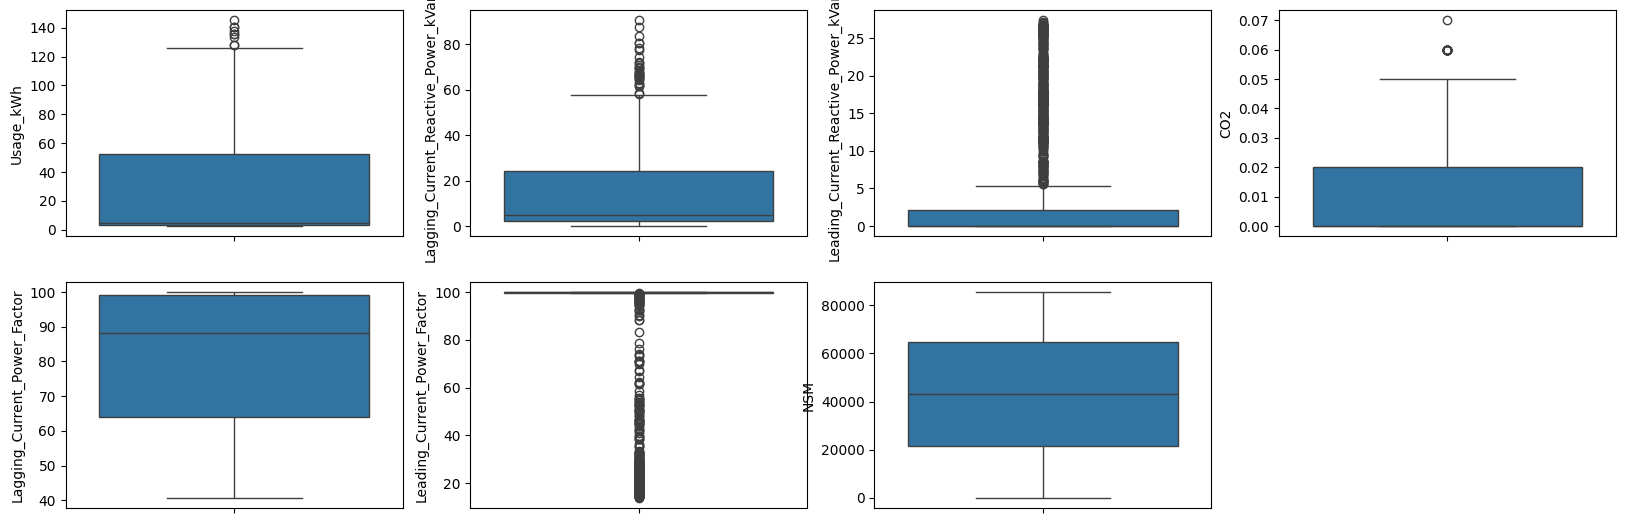

In [379]:
# check for outliers. Plot subplots of boxplot for numerical columns 
plt.figure(figsize=(20,10))
subplots = 1
for i in df.select_dtypes(include=[np.number]).columns:
    plt.subplot(3,4,subplots)
    sns.boxplot(df[i])
    subplots += 1



### observation
- Outliers are noticed in Usage_kWh, Lagging_Current_Reactive_Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2, Leading_Current_Power_Factor columns.
- These outliers needs to be treated with Log or cubic root transformation

### 2. Data formating - Formating data suitable to requirments

In [380]:
# converting date column to datetime format YYYY-MM-DD TT:TT:TT
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['date'].head()

0   2018-01-01 02:30:00
1   2018-01-01 04:15:00
2   2018-01-01 05:45:00
3   2018-01-01 10:00:00
4   2018-01-01 10:30:00
Name: date, dtype: datetime64[ns]

### 3. Data Imputation - Handling missing values in the dataset through imputation techniques (KNN (K-Nearest Neighbors) imputation or regression imputation)

- there are no missing values found in the dataset. Therefore, There is no requirement for data imputation

### 4. Data Transformation - Scaling, Normalization, Encoding Categorical variables, and Feature engineering

- Encoding Categorical variables

In [381]:
df.describe(include=['object'])

,WeekStatus,Day_of_week
count,2190,2190
unique,2,7
top,Weekday,Friday
freq,1586,333


In [382]:
# one hot encoding the categorical columns WeekStatus and Day_Of_Week
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week'], drop_first=True, dtype=int )
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,0,1,0,0,0,0,0
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,0,1,0,0,0,0,0
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,0,1,0,0,0,0,0
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,0,1,0,0,0,0,0
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,0,1,0,0,0,0,0


- Treating Outliers

In [383]:
# findout columsnames with outliers
outliers = ut.get_outliers_columns(df)
# exclude colums name start with "Day_of_week"
outliers = [i for i in outliers if not i.startswith('Day_of_week')]
outliers


['Usage_kWh',
 'Lagging_Current_Reactive_Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2',
 'Leading_Current_Power_Factor']

In [384]:
# findout from outliers columns that has zero values
outliers_zero = [i for i in outliers if (df[i] == 0).sum() > 0]
outliers_zero


['Lagging_Current_Reactive_Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2']

### Observation
- we cannot apply log transformation for the following columns because it contains zero values. 
    - Lagging_Current_Reactive_Power_kVarh
    - Leading_Current_Reactive_Power_kVarh
    - CO2
therefore, we apply cubic root transformation to these columns 
- For usage_kWh and Leading_Current_Power_Factor columns, we can apply log transformation since does not have zero values

In [385]:
# apply cubic root transformation to columns with outliers and zero values
for i in outliers_zero:
    df[i] = np.cbrt(df[i]+1.5) # adding 1.5 to avoid negative values
df[outliers_zero].head()


,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2
0,1.839064,1.144714,1.144714
1,1.745704,1.144714,1.144714
2,1.708835,1.144714,1.144714
3,1.144714,2.639055,1.144714
4,1.144714,2.691606,1.144714


In [386]:
# apply log transformation to columns with outliers and non - zero values
outliers_non_zero = [i for i in outliers if i not in outliers_zero]
for i in outliers_non_zero:
    df[i] = np.log(df[i]+2.85) ## adding 2.85 to avoid negative values
df[outliers_non_zero].head()


,Usage_kWh,Leading_Current_Power_Factor
0,1.891605,4.633272
1,1.813195,4.633272
2,1.813195,4.633272
3,1.870263,3.175133
4,1.880991,3.137232


### Scaling

In [387]:
# apply RobustScaler to columns with outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = RobustScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns].head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,-0.055136,-0.022002,0.000000,0.0,-0.737075,0.000000,-0.791667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.090582,-0.088238,0.000000,0.0,-0.661852,0.000000,-0.645833,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.090582,-0.114395,0.000000,0.0,-0.566321,0.000000,-0.520833,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.064784,-0.514621,3.717580,0.0,0.335216,-624.143842,-0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.059934,-0.514621,3.848314,0.0,0.335216,-640.367070,-0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


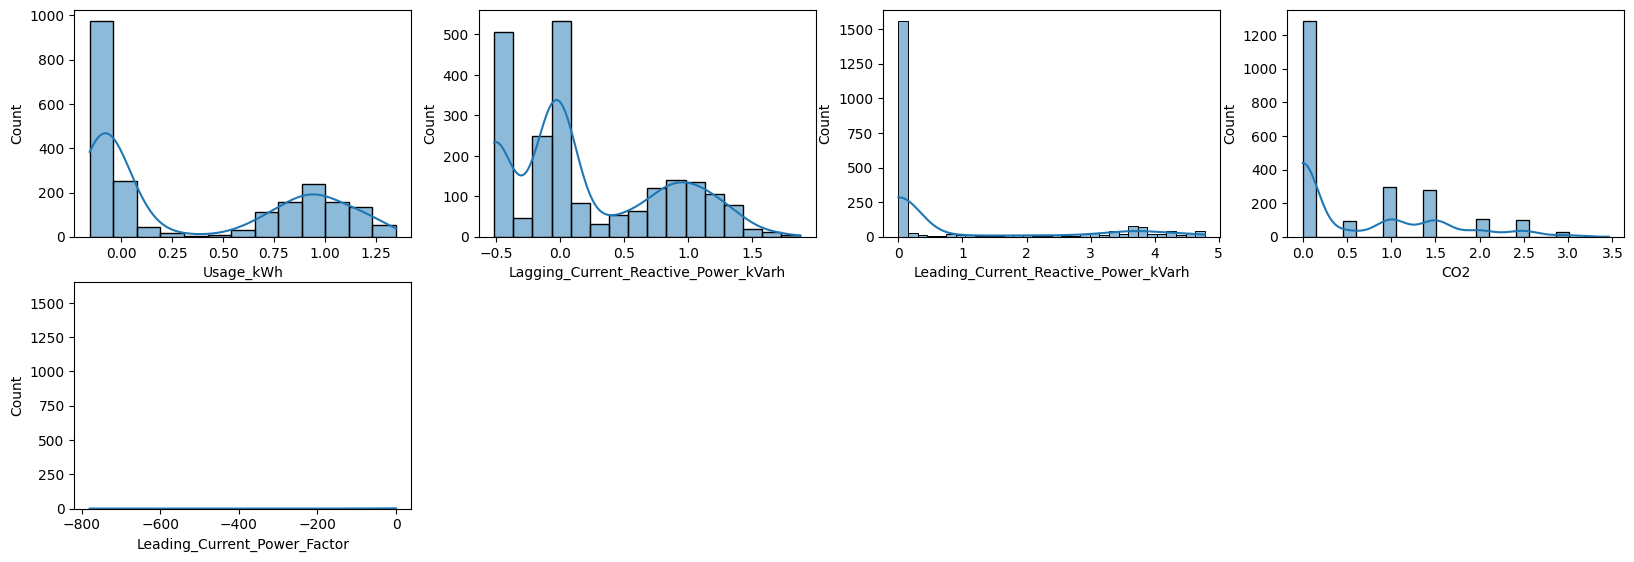

In [388]:
# visualize the distribution of the columns with outliers
plt.figure(figsize=(20,10))
subplots = 1
for i in df[outliers].columns:
    plt.subplot(3,4,subplots)
    sns.histplot(df[i], kde=True)
    subplots += 1

### Observation
- Numerical columns have been transformed, rescaled and normalized

### Feature Engineering 
- As per the instuction given in the project description, New coloum named "Usage_kWh_categorical" needs to be created and one hot encode will be applied

In [389]:
# creating a new column Usage_kWh_categorical based on the mean of Usage_kWh column
df['Usage_kWh_categorical'] = np.where(df['Usage_kWh'] > df['Usage_kWh'].mean(), 'High', 'Low')
df['Usage_kWh_categorical'].value_counts()

Usage_kWh_categorical
Low     1287
High     903
Name: count, dtype: int64

### Applying Data transformation for the newly created categorial value

In [390]:
# since newly created column Usage_kWh_categorical is ordinal, we can map it to 0 and 1
df['Usage_kWh_categorical'] = df['Usage_kWh_categorical'].map({'Low':0, 'High':1})

### 5. Feature Selection 

1. Droping date column. The motivating reason for dropping date column is that , it is temporal and this analysis only focus on numerical and categorical.
2. The reason for droping Leading_Current_Power_Factor column is that, it may introduce noise to the model

In [391]:
# drop the column date and Leading_Current_Power_Factor
df.columns
df = df.drop(['date', 'Leading_Current_Power_Factor'], axis=1)


### 6. Data sampling - addressing data imbalance

In [392]:
# aplly stratified split to split the data into train and test
X = df.drop('Usage_kWh_categorical', axis=1)
y = df['Usage_kWh_categorical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Text(0.5, 1.0, 'Test Data')

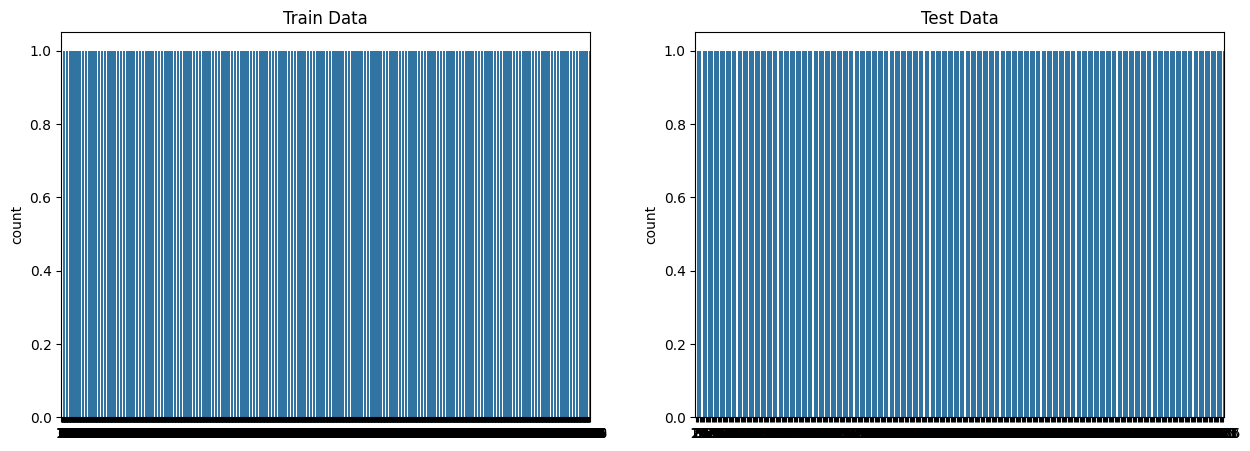

In [393]:
# visualize stratified split
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Train Data')
sns.countplot(y_test, ax=ax[1])
ax[1].set_title('Test Data')


### 7. Data Validation - Using Cross validation method

In [395]:
# Fit a model on the train data
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [396]:
# predict the model on the test data
y_pred = model.predict(X_test)

In [397]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.008238645489733739


### Conclution
- Low value from Mean squared error indicates that, Model has performed well on preprocessed dataset, therefore, it is concluded that, the Data preprocessing has been done well. 

### Saving preprocessed dataset with vesioning.

In [398]:
# save data to data/processed folder
X_train.to_csv('../../../data/processed/X_train_v1.csv', index=False)
y_train.to_csv('../../../data/processed/y_train_v1.csv', index=False)
X_test.to_csv('../../../data/processed/X_test_v1.csv', index=False)
y_test.to_csv('../../../data/processed/y_test_v1.csv', index=False)

print('Data Preprocessing Completed Successfully')


Data Preprocessing Completed Successfully
